In [38]:
import requests

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import time
import random

from scipy.cluster.vq import kmeans2, whiten

In [39]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = {'X-Auth-Token': '6343e2401b274e4b9d3233b7291115e5' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [40]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams/?season=2016', 'teams')
# teams

Получим данные по стоимости и подсчитаем кол-во проигрышей.


In [41]:
for team in teams:
    market_value = team['squadMarketValue']
    # Получим кол-во проигрышей
    fixtures = call_api('{0}/?season=2016'.format(team['_links']['fixtures']['href']), 'fixtures')
    time.sleep(4)
    losses = 0
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            if f["result"]["goalsHomeTeam"] < f["result"]["goalsAwayTeam"]:
                losses += 1  # Прибавили к кол-ву проигрышей
        elif team['name'] == f["awayTeamName"]:
            if f["result"]["goalsAwayTeam"] < f["result"]["goalsHomeTeam"]:
                losses += 1  # Прибавили к кол-ву проигрышей гостевой команде
            
    print('Team "{0}", Market Value: {1}, {2} losses'.format(team["name"], market_value, losses))
    team['market_value'] = market_value
    team['losses'] = losses

Team "FC Rio Ave", Market Value: None, 13 losses
Team "FC Porto", Market Value: None, 5 losses
Team "Moreirense FC", Market Value: None, 16 losses
Team "FC Paços de Ferreira", Market Value: None, 14 losses
Team "Sporting CP", Market Value: None, 11 losses
Team "Maritimo Funchal", Market Value: None, 10 losses
Team "CD Tondela", Market Value: None, 17 losses
Team "SL Benfica", Market Value: None, 5 losses
Team "Boavista Porto FC", Market Value: None, 11 losses
Team "FC Arouca", Market Value: None, 20 losses
Team "Vitoria Setubal", Market Value: None, 16 losses
Team "C.F. Os Belenenses", Market Value: None, 16 losses
Team "Vitoria Guimaraes", Market Value: None, 8 losses
Team "Sporting Braga", Market Value: None, 10 losses
Team "GD Estoril Praia", Market Value: None, 16 losses
Team "Feirense", Market Value: None, 14 losses
Team "Nacional Funchal", Market Value: None, 21 losses
Team "G.D. Chaves", Market Value: None, 13 losses


Готовим данные для трансформации в Pandas

In [42]:
team_for_pd = []
for team in teams:
    team_for_pd.append({'name': team['name'], 'market_value': team['market_value'], 'losses': team['losses']})
# team_for_pd

Трансформируем

In [43]:
teams_pd = pd.DataFrame(team_for_pd)
# teams_pd

In [44]:
# Сгенерируем случайные стоимости комманды при отсутствии этих данных. 
teams_pd['market_value'] = [random.randint(250000, 950000) for value in teams_pd['market_value'] if value == None]
# teams_pd

Отображаем

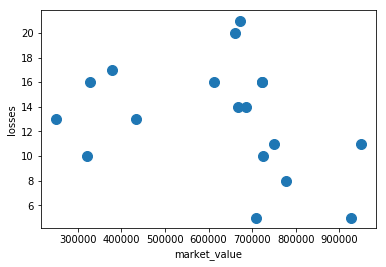

In [45]:
teams_pd.plot.scatter(x='market_value', y='losses', s=100)

Удаляем колонку с именами

In [46]:
del teams_pd['name']
# teams_pd

Нормализация данных

In [47]:
whitened = whiten(teams_pd.as_matrix())
# whitened

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Сделаем 3 кластера

In [48]:
centroids, cluster_map = kmeans2(whitened, 3)
# centroids, cluster_map

Зададим цвета для каждого кластера

In [49]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

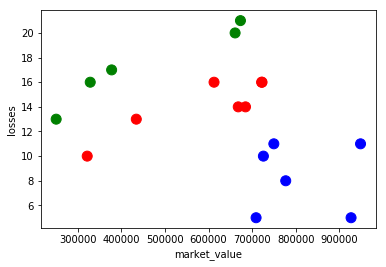

In [50]:
teams_pd.plot.scatter(x='market_value', y='losses', c=colors, s=100)

Сделаем 5 кластеров

In [54]:
centroids, cluster_map = kmeans2(whitened, 5)
# centroids, cluster_map

In [55]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

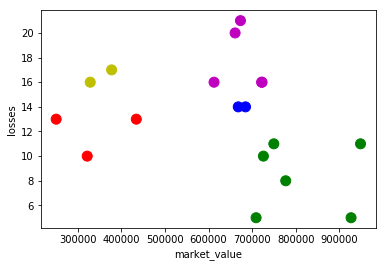

In [56]:
teams_pd.plot.scatter(x='market_value', y='losses', c=colors, s=100)